<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/GANs/blob/main/IndigenanoAndes1930.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='blue'> Colorizer Artístico </font>**

# DeOldify - Colorize suas próprias fotos!










#Verifique as configurações corretas de tempo de execução


No menu "Runtime" da janela do notebook, selecione "Alterar tipo de tempo de execução". Certifique-se de que o seguinte seja selecionado:
* Tipo de tempo de execução = Python 3
* Acelerador de hardware = GPU


# Git clone e instale o DeOldify

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2327, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 2327 (delta 47), reused 27 (delta 10), pack-reused 2228
Receiving objects: 100% (2327/2327), 69.46 MiB | 26.07 MiB/s, done.
Resolving deltas: 100% (1055/1055), done.


In [2]:
cd DeOldify

/content/DeOldify


# Setup

In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [4]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 5.2 MB/s 
     |████████████████████████████████| 129 kB 42.2 MB/s 
     |████████████████████████████████| 1.9 MB 41.8 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=acbb89b010751e3b559f0e8628745202254da433b6b859be775692c282b24ef6
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [5]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [6]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2021-12-15 18:02:31--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  25.9MB/s    in 9.9s    

2021-12-15 18:02:41 (24.5 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [7]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-12-15 18:02:44--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-12-15 18:02:44 (58.0 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [8]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

# Instruções

### Busca URL
Digite um url para um link direto de uma imagem. Normalmente, isso significa que eles terminarão em .png, .jpg, etc. NOTA: Se você quiser usar sua própria imagem, carregue-a primeiro em um site como o Imgur. 

### Fator de Renderização
O valor padrão de 35 foi escolhido com cuidado e deve funcionar -ok- para a maioria dos cenários (mas provavelmente não será o -melhor-). Isso determina a resolução na qual a parte colorida da imagem é renderizada. Resolução mais baixa será renderizada mais rapidamente e as cores também tendem a parecer mais vibrantes. Imagens mais antigas e de qualidade inferior, em particular, geralmente se beneficiam com a redução do fator de renderização. Fatores de renderização mais altos costumam ser melhores para imagens de qualidade superior, mas as cores podem ficar ligeiramente desbotadas. 

### marca d'água
Selecionado por padrão, isso coloca um ícone de marca d'água de uma paleta no canto inferior esquerdo da imagem. Pretende-se que seja uma forma padrão de transmitir a outras pessoas que visualizam a imagem que ela foi colorida por IA. Queremos ajudar a promover isso como um padrão, especialmente à medida que a tecnologia continua a melhorar e a distinção entre o real e o falso se torna mais difícil de discernir. Esta prática de marca d'água de paleta foi iniciada e liderada pela empresa MyHeritage no recurso MyHeritage In Color (que usa uma versão mais recente do DeOldify do que a que você está usando aqui).

#### Como fazer o download de uma cópia
Basta clicar com o botão direito na imagem exibida e clicar em "Salvar imagem como ..."!

## Dicas Profissionais

Você pode avaliar o quão bem a imagem é renderizada em cada render_factor usando o código na parte inferior (aquela célula em "Veja como os valores render_factor funcionam em um quadro aqui").

# Colorize!!

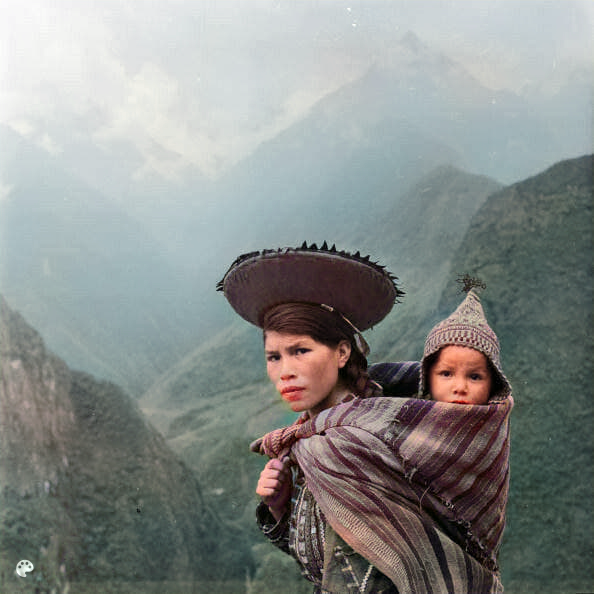

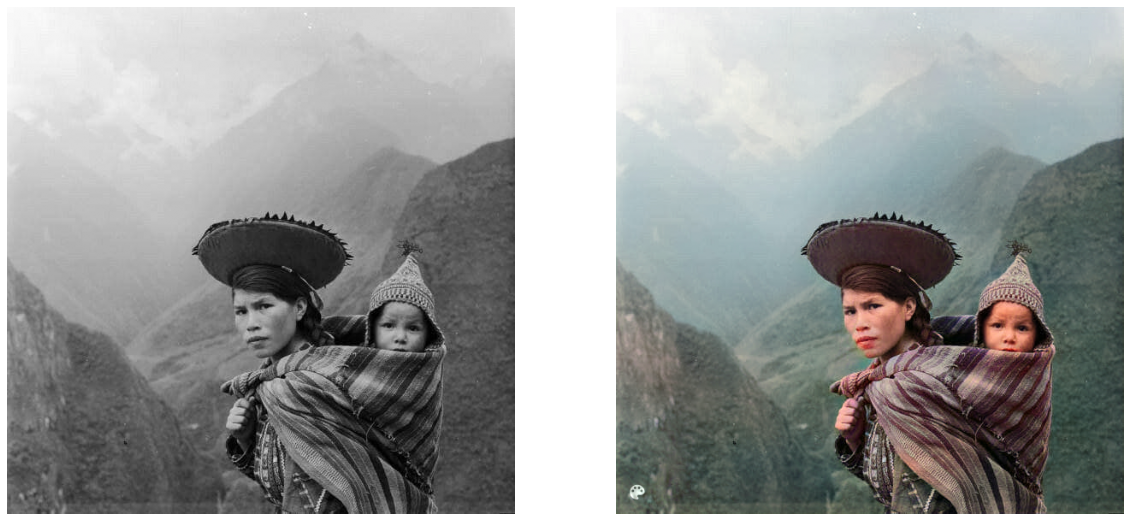

In [39]:
source_url = 'https://i.redd.it/0rpmq0kzok581.jpg' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## Veja como os valores render_factor funcionam variando na imagem aqui

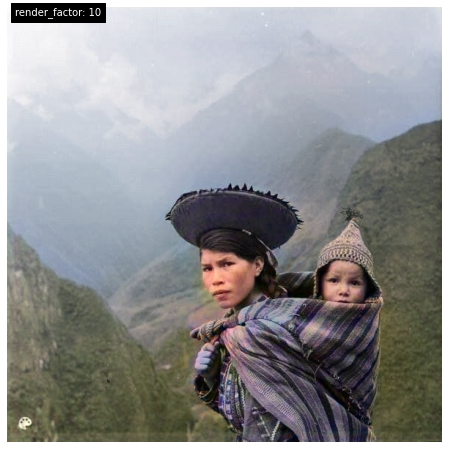

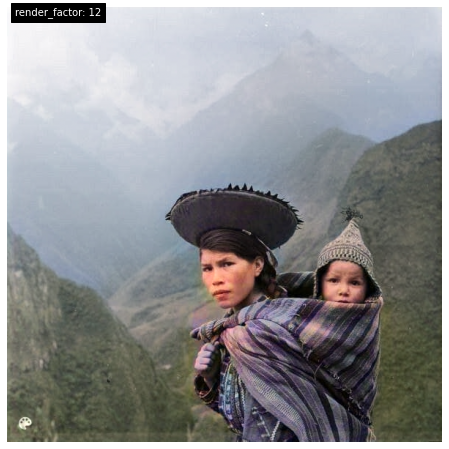

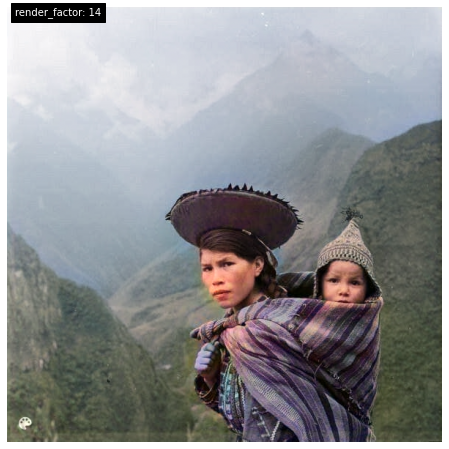

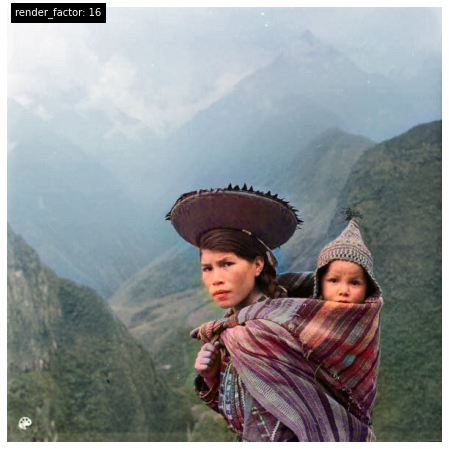

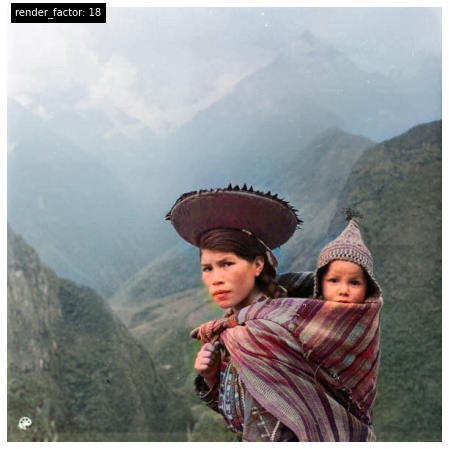

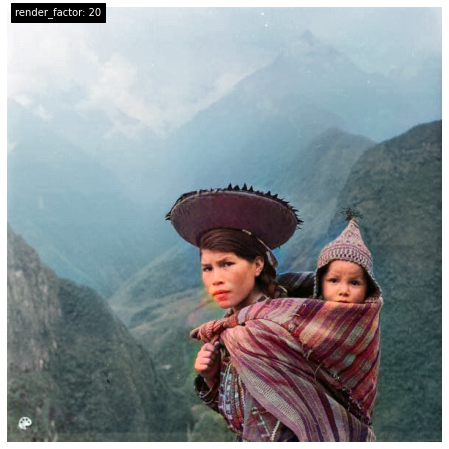

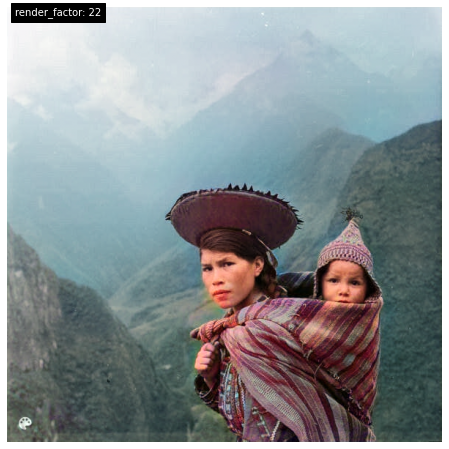

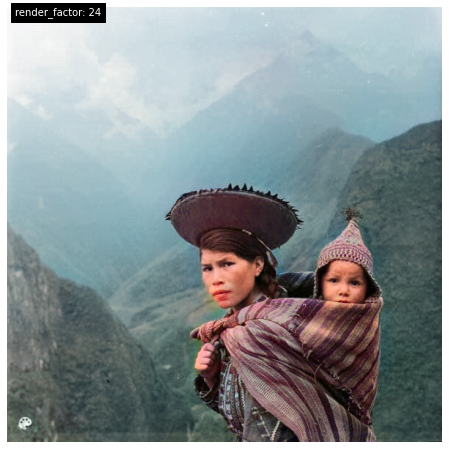

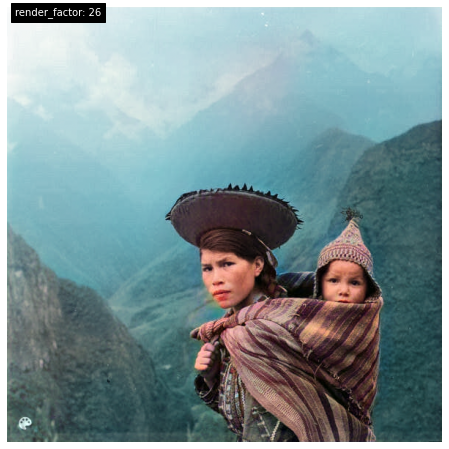

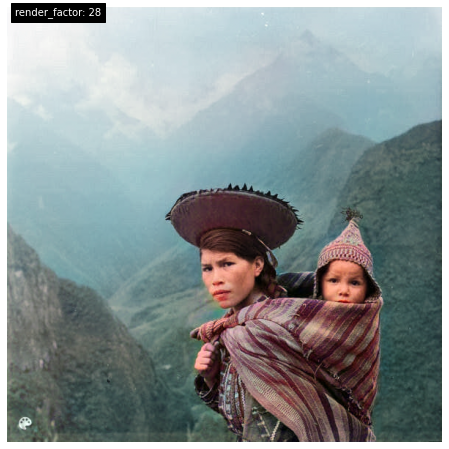

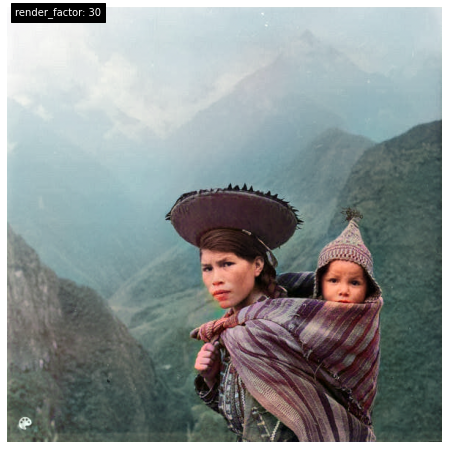

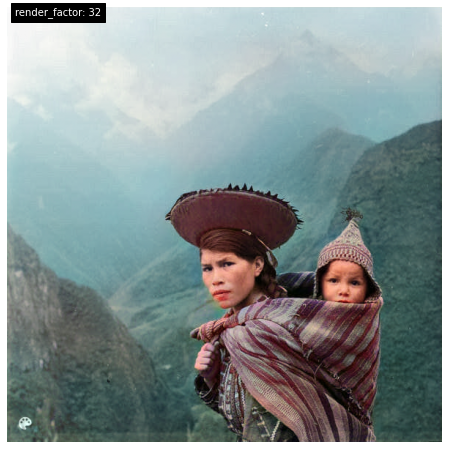

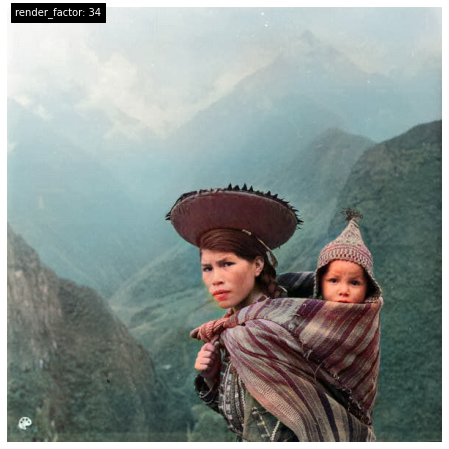

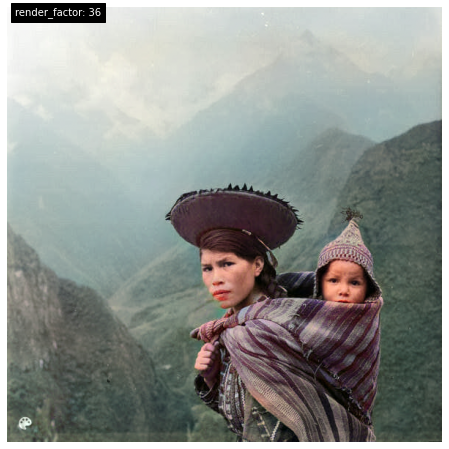

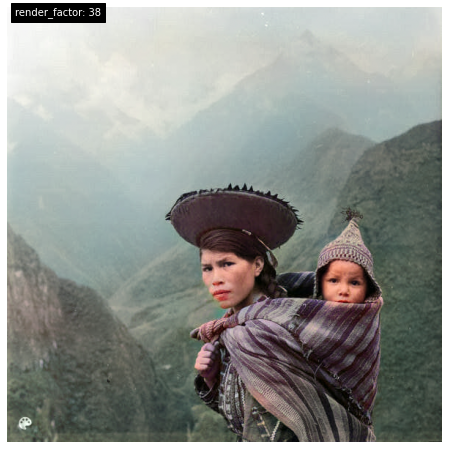

In [40]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

---
#⚙ Recommended image sources 
* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)